In [94]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise.model_selection import KFold
from surprise import Dataset
import pandas as pd

In [2]:
data = pd.read_csv('ratings_Electronics.csv',header = None)

In [3]:
data.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
df = data.drop([3], axis=1) # dropping the last column of timestamp values since they dont seem to be relevant

In [5]:
df.columns = ['userId', 'productId','rating'] #renaming columns

In [95]:
df.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [96]:
#data[0].groupby(data[0]).sum()[0]
#df_new  = data.loc[[1,2,3]]
#df1.groupby(['State'])['Sales'].count()
#df_new = data[0].value_counts()>50
#df_new = data[0][data.groupby(data[0])[0].count()>50
#data[[0,1,2]].groupby([0]).size().reset_index(name='counts').counts>50
# data[data[0].map(data[0].value_counts()) > 50].head()
df_new = df.groupby('userId').filter(lambda x: len(x)>50)
df_new.describe()

,rating
count,122171.000000
mean,4.262616
std,1.058826
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [97]:
df_new.head()

,userId,productId,rating
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


In [98]:
df_new.dtypes

userId        object
productId     object
rating       float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021627828>,
      dtype=object)

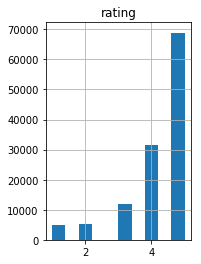

In [99]:
 df_new.hist(layout=(1,2))

In [100]:
#We could see that most (70,000 out of 1.2 lakhs) of the ratings fall into '5' rating category.

In [101]:
reader = Reader(rating_scale=(1, 5))

In [102]:
dataset = Dataset.load_from_df(df_new, reader)

In [103]:
trainset, testset = train_test_split(dataset, test_size=0.3)

In [104]:
# define a cross-validation iterator
kf = KFold(n_splits=3)

In [114]:
#'user_based': True indicating that this would be a user-user collab filtering
#This is because the objective is to "Build a recommendation system to recommend products to
#customers based on the their previous ratings for other products", so similar ratings by other users would help
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [115]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [116]:
test_pred

[Prediction(uid='A3QKIR8J56EUI1', iid='B0042SDDXM', r_ui=1.0, est=2.953488372093023, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3V7D0LH8L7BG0', iid='B005QXX0MG', r_ui=4.0, est=4.910236160555886, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A3T7V207KRDE2O', iid='B001JBYMTO', r_ui=5.0, est=4.275862068965517, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ACJT8MUC0LRF0', iid='B0093AN1OA', r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A26KXNN6H1IL0I', iid='B008O2HVIK', r_ui=5.0, est=4.26984126984127, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3MQ15651KGVLJ', iid='B0096239FG', r_ui=5.0, est=4.538461538461538, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2ED50E3KWKUKW', iid='B005IMU06O', r_ui=5.0, est=4.26528607677826, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1AZQCVCDBQP6', iid='B000

In [117]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0578


1.0577827244286189

In [118]:
for trainset, testset in kf.split(dataset):
    # train and test algorithm.
    algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    algo.fit(trainset)
    # run the trained model against the testset
    test_pred = algo.test(testset)
    print("User-based Model : Test Set")
    accuracy.rmse(test_pred, verbose=True)

    

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
User-based Model : Test Set
RMSE: 1.0496
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
User-based Model : Test Set
RMSE: 1.0443
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
User-based Model : Test Set
RMSE: 1.0657


In [119]:
#From the above its clear that RMSE isnt falling below the level of 1.051, so we could try changing the hyper parameter 'k'

In [120]:
algo = KNNWithMeans(k=1000, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [121]:
test_pred = algo.test(testset)
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0657


1.0657366714384064

In [122]:
#Even changing the 'K' hyper param doesnt reduce the RMSE score below 1. And as we also see from the test prediction
# the model is giving wrong predictions since for uid='A2ED50E3KWKUKW' and iid='B005IMU06O' which is an existing entry
# it shows as though it doesnt exist by giving the output for parameter "details={'was_impossible': True"

#So we could abandon the 'pearson_baseline' simulation technique and try another 'cosine'

In [123]:
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between user choices
}
algo = KNNWithMeans(k=50, sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [124]:
test_pred = algo.test(testset)
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0687


1.0686585121317103

In [125]:
#The RMSE is even worse so we abandon cosine technique as well

In [126]:
from surprise.model_selection import GridSearchCV

sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...


MemoryError: 

In [ ]:
#Not sure why there is a memory error????????

In [128]:
from surprise import SVD
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(dataset)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9858167135356157
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [133]:
#Seems like SVD using GrdiSearchCV gives some improved results for RMSE
algo = gs.best_estimator['rmse']
algo.fit(trainset)

In [134]:
#Randomly chosen userid and productid
uid='A2VALCFTOWFYXZ'
iid='B00558OP3U'
prediction = algo.predict(uid, iid)

In [135]:
prediction

Prediction(uid='A2VALCFTOWFYXZ', iid='B00558OP3U', r_ui=None, est=3.5064899329264394, details={'was_impossible': False})

In [136]:
#The above prediction gives a rating of 3.5 whereas the actual is 2. 
#The results are much better than others used till now and this could be the model to be used 
#for recomending users with products with good predicted ratings 

In [64]:
df_grouped_by_pdt_rating_mean = pd.DataFrame(df_new.groupby('productId')['rating'].mean())

In [65]:
df_grouped_by_pdt_rating_mean['rating_count'] = pd.DataFrame(df_new.groupby('productId')['rating'].count())

In [78]:
df1 = df_new.groupby(['userId','productId']).count()
df1.sort_values(by='userId', ascending=True)

rating
userId         productId         
A100UD67AHFODS B00004Z5M1       1
               B0088PU86K       1
               B0082E9K7U       1
               B007QWF9GK       1
               B007P6Y1T8       1
               B007E8IJM2       1
               B007BXSC8Q       1
               B0077YTFPS       1
               B00746LVOM       1
               B0071BTJPI       1
               B0071369M2       1
               B006X2HIR2       1
               B006SOLITY       1
               B006N05A5Q       1
               B006KESOYY       1
               B0060US0AQ       1
               B005PQTYHE       1
               B005P7XTJ2       1
               B005OA3BSY       1
               B005LS2FS6       1
               B005I7X3RC       1
               B005HSG3L0       1
               B005EHHM5A       1
               B005DOK8NW       1
               B005CLPP8E       1
               B0054JJ0QW       1
               B008FC8FJ8       1
               B008HO9DIG       1
               B008PU665A       1
               B008R3875C       1
...                           ...
AZOK5STV85FBJ  B003LYKLCO       1
               B000VS7XY2       1
               B000EDMPQK       1
               B000UGT5GO       1
               B00FB2XNCE       1
               B00003006E       1
               B00005854B       1
               B000093S2G       1
               B0002BA570       1
               B0002D6K9U       1
               B0002L5R78       1
               B00068YUN4       1
               B0007OWNYA       1
               B0007WRQ4Y       1
               B000CMGJ0G       1
               B000UTPI9Y       1
               B000CQQ092       1
               B000E922SA       1
               B000ERAOMS       1
               B000FFT2KE       1
               B000GL3MOY       1
               B000H8WLKC       1
               B000HWVOFQ       1
               B000J2ZPJU       1
               B000L1AUH6       1
               B000NNQO8Q       1
               B000O5N5AI       1
               B000QSJWO6       1
               B000CSOJ2K       1
               B00JG5VV9O       1

[122171 rows x 1 columns]

In [69]:
df_grouped_by_pdt_rating_mean.sort_values(by='rating', ascending=False).head()

,rating,rating_count
productId,,
B00LKG1MC8,5.0,1
B001UE6HZ2,5.0,1
B001UKJ8FC,5.0,1
B001UK6UO4,5.0,1
B0082N9DGY,5.0,1


In [71]:
df_grouped_by_pdt_rating_byUser_mean = pd.DataFrame(df_new.groupby('userId','productId')['rating'].mean())

ValueError: No axis named productId for object type <class 'type'>